In [1]:
%pylab inline
import calin.calib.spe_fit
import calin.math.histogram
import calin.math.optimizer
import calin.math.pdf_1d

Populating the interactive namespace from numpy and matplotlib


## Load data and plot histogram

In [2]:
fernandez_data = loadtxt('../../calib/fernandez_dc_1.5kV_6.45V.dat');
mes_hist = calin.math.histogram.SimpleHist(1.0)
mes_hist.insert_vec(fernandez_data);

## Fit of single-Gaussian model

In [3]:
ped_gauss_pdf = calin.math.pdf_1d.GaussianPDF()

In [4]:
ses_g_pdf = calin.math.pdf_1d.LimitedGaussianPDF(0,numpy.inf)
mes_model_g = calin.calib.spe_fit.GeneralPoissonMES(mes_hist.xval_left(0), mes_hist.dxval(),\
        mes_hist.size(), ses_g_pdf, ped_gauss_pdf)
like_g = calin.calib.spe_fit.SPELikelihood(mes_model_g, mes_hist)
opt_g = calin.math.optimizer.NLOptOptimizer("LD_LBFGS", like_g)
opt_g.set_verbosity_level(calin.math.optimizer.OptimizerVerbosityLevel_MAX);
opt_g.set_abs_tolerance(0.0001);
opt_g.set_initial_values([1.0, 355.0, 10.0, 500.0, 200.0]);
opt_g.set_limits_lo([0.01, 300.0, 0.1, 100.0, 10.0])
opt_g.set_limits_hi([2.0,  400.0, 100.1, 1000.0, 500.0])
status, xopt_g, fval_g = opt_g.minimize()
print(xopt_g, fval_g)
status, err_mat_g = opt_g.calc_error_matrix()
xerr_g = sqrt(err_mat_g.diagonal())
print(xerr_g)

[   1.04990191  358.72165658   51.04687963  454.92516744  165.28480598] 72518.83149087398
[ 0.01317109  1.00096589  0.81565011  3.937259    3.9766476 ]


## Fit of exponential/Gaussian model

In [5]:
ses_eg_exp_pdf = calin.math.pdf_1d.LimitedExponentialPDF(0,numpy.inf,mes_hist.dxval())
ses_eg_exp_pdf.limit_scale(0.1, inf);
ses_eg_gauss_pdf = calin.math.pdf_1d.LimitedGaussianPDF(0,numpy.inf)
ses_eg_pdf = calin.math.pdf_1d.TwoComponentPDF(ses_eg_exp_pdf, "exp", ses_eg_gauss_pdf, "gauss")
mes_model_eg = calin.calib.spe_fit.GeneralPoissonMES(mes_hist.xval_left(0), mes_hist.dxval(),\
        mes_hist.size(), ses_eg_pdf, ped_gauss_pdf)
like_eg = calin.calib.spe_fit.SPELikelihood(mes_model_eg, mes_hist)
opt_eg = calin.math.optimizer.NLOptOptimizer("LD_LBFGS", like_eg)
#opt_eg.set_scale([0.1,0.1,1.0,0.01,1.0,1.0,0.05]);
opt_eg.set_verbosity_level(calin.math.optimizer.OptimizerVerbosityLevel_MAX);
opt_eg.set_abs_tolerance(0.0001);
opt_eg.set_max_iterations(1000);
opt_eg.set_initial_values([1.0, 355.0, 10.0, 0.1, 200.0, 500.0, 200.0]);
opt_eg.set_limits_lo([0.01, 300.0, 0.1, 0.0, 10.0, 100.0, 10.0])
opt_eg.set_limits_hi([2.0,  400.0, 100.1, 1.0, 500.0, 1000.0, 500.0])
status, xopt_eg, fval_eg = opt_eg.minimize()
print(xopt_eg, fval_eg)
status, err_mat_eg = opt_eg.calc_error_matrix()
xerr_eg = sqrt(err_mat_eg.diagonal())
print(xerr_eg)

[  1.21958383e+00   3.51232214e+02   4.64338310e+01   3.15225185e-01
   1.96041860e+02   4.92991929e+02   1.21171345e+02] 72466.89689786671
[  2.64560705e-02   1.25234470e+00   8.48859901e-01   3.37910425e-02
   3.71090587e+01   3.94204839e+00   5.33874632e+00]


In [6]:
status, err_mat_eg, eval_eg, evec_eg = opt_eg.calc_error_matrix_and_eigenvectors()
xerr_eg = sqrt(err_mat_eg.diagonal())
print(xerr_eg)
err_mat_eg = matrix(err_mat_eg)
evec_eg = matrix(evec_eg)

[  2.64560705e-02   1.25234470e+00   8.48859901e-01   3.37910425e-02
   3.71090587e+01   3.94204839e+00   5.33874632e+00]


## Fit of double-Gaussian model

Mean of one of the Gaussians is fixed at zero in the fit

In [7]:
ses_2g_g1_pdf = calin.math.pdf_1d.LimitedGaussianPDF(0,numpy.inf)
ses_2g_g2_pdf = calin.math.pdf_1d.LimitedGaussianPDF(0,numpy.inf)
ses_2g_pdf = calin.math.pdf_1d.TwoComponentPDF(ses_2g_g1_pdf, "g1", ses_2g_g2_pdf, "g2")
mes_model_2g = calin.calib.spe_fit.GeneralPoissonMES(mes_hist.xval_left(0), mes_hist.dxval(),\
        mes_hist.size(), ses_2g_pdf, ped_gauss_pdf)
like_2g = calin.calib.spe_fit.SPELikelihood(mes_model_2g, mes_hist)
freezer = calin.math.function.FreezeThawFunction(like_2g)
freezer.freeze(4,0)
opt_2g = calin.math.optimizer.NLOptOptimizer("LD_LBFGS", freezer)
#opt_2g.set_scale([0.1,0.1,1.0,0.01,1.0,1.0,0.05]);
opt_2g.set_verbosity_level(calin.math.optimizer.OptimizerVerbosityLevel_MAX);
opt_2g.set_abs_tolerance(0.0001);
opt_2g.set_initial_values([1.0, 355.0, 10.0, 0.1, 200.0, 500.0, 200.0]);
status, xopt_2g, fval_2g = opt_2g.minimize()
print(xopt_2g, fval_2g)

[  1.18930676e+00   3.52214093e+02   4.68817800e+01   2.55606341e-01
   1.97934671e+02   4.94651876e+02   1.22595480e+02] 72465.71922122368


In [8]:
status, err_mat_2g, eval_2g, evec_2g = opt_2g.calc_error_matrix_and_eigenvectors()
xerr_2g = sqrt(err_mat_2g.diagonal())
print(xerr_2g)
err_mat_2g = matrix(err_mat_2g)
evec_2g = matrix(evec_2g)

[  2.28579177e-02   1.23423115e+00   8.53107374e-01   3.75734366e-02
   4.83984011e+01   7.41959439e+00   5.75787437e+00]


## MCMC in Python

In [9]:
def rand_gauss(basis,sigma):
    x = basis*transpose(matrix(sigma*randn(sigma.size)))
    x = squeeze(asarray(x))
    return x

def mcmc(model,like,xopt,fopt,err_basis,err_sigma):
    x = xopt
    f = 1

    accept = 0
    g_all = []
    r_all = []
    p0_all = []
    lqp_all = []

    like.value(xopt)
    ses_y = asarray(model.n_electron_spectrum(1));
    ses_x = asarray(list(map(lambda i: model.ses_x(i), range(0,len(ses_y)))))
    ses_norm = sum(ses_y)
    ses_mean = sum(ses_y*ses_x)
    ses_rms = sqrt(sum(ses_y*ses_x*ses_x) - ses_mean**2)
    lqp = sum(ses_y[ses_x<0.2*ses_mean])
    for i in range(0,10000):
        xp = x + rand_gauss(err_basis, err_sigma)
#        print(x,xp)
        val = like.value(xp)
        fp = exp(fopt-val)
#        print(fp>f or rand(1)>fp/f,f,val,fopt-val,fp)
        if(fp>f or rand(1)<fp/f):
            accept += 1
            x = xp
            f = fp

            ses_y = asarray(model.n_electron_spectrum(1));
            ses_x = asarray(list(map(lambda i: model.ses_x(i), range(0,len(ses_y)))))
            ses_norm = sum(ses_y)
            ses_mean = sum(ses_y*ses_x)
            ses_rms = sqrt(sum(ses_y*ses_x*ses_x) - ses_mean**2)
            lqp = sum(ses_y[ses_x<0.2*ses_mean])
        if(i<100):
            next
        g_all.append(ses_mean)
        r_all.append(ses_rms/ses_mean)
        p0_all.append(x[0])
        lqp_all.append(lqp)
    return accept, g_all, r_all, p0_all, lqp_all

**Exponential/Gaussian**

In [10]:
accept, g_eg_all, r_eg_all, p0_eg_all, lqp_eg_all = \
    mcmc(mes_model_eg, like_eg, xopt_eg, fval_eg, evec_eg,sqrt(eval_eg)*0.6)
print(accept)

4282


In [11]:
print(mean(p0_eg_all), std(p0_eg_all))
print(mean(g_eg_all), std(g_eg_all))
print(mean(r_eg_all), std(r_eg_all))
print(mean(lqp_eg_all), std(lqp_eg_all))

1.22045182384 0.027509962465
399.548785154 7.55621197517
0.511996983118 0.0151686211158
0.106142063064 0.0096113888097


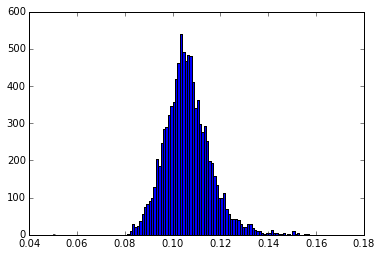

In [12]:
hx = frange(0.05,0.17,0.001)
heg = hist(lqp_eg_all,hx);

**Double Gaussian**

In [13]:
accept, g_2g_all, r_2g_all, p0_2g_all, lqp_2g_all = \
    mcmc(mes_model_2g, freezer, xopt_2g, fval_2g, evec_2g, sqrt(eval_2g)*0.6)
print(accept)

3860


In [14]:
print(mean(p0_2g_all), std(p0_2g_all))
print(mean(g_2g_all), std(g_2g_all))
print(mean(r_2g_all), std(r_2g_all))
print(mean(lqp_2g_all), std(lqp_2g_all))

1.17645928026 0.0216548047661
412.960722795 6.09392090078
0.460292930382 0.0122662528147
0.0755694509352 0.00633247851512


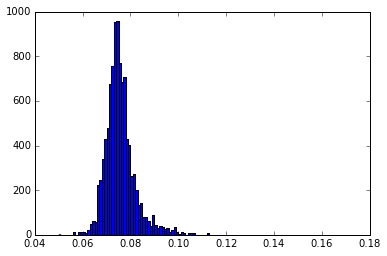

In [15]:
h2g = hist(lqp_2g_all, hx);

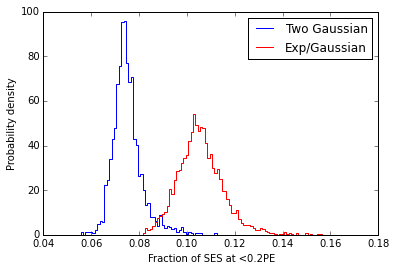

In [16]:
step(0.5*(hx[0:-1]+hx[1:]),h2g[0]/sum(h2g[0])/(hx[1]-hx[0]), 'b', label='Two Gaussian')
hold('on')
step(0.5*(hx[0:-1]+hx[1:]),heg[0]/sum(heg[0])/(hx[1]-hx[0]), 'r', label='Exp/Gaussian')
xlabel('Fraction of SES at <0.2PE')
ylabel('Probability density')
legend()